<a href="https://colab.research.google.com/github/johanstevenbejarano/Teoria-de-Aprendizaje-Maquina/blob/main/Ejercicios%20TAM_2025-1%20/5_DeepLearning/2_DL_Keras_API_funcional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creación de arquitecturas de aprendizaje profundo mediante API funcional de Keras.

- Se presentan los consideraciones básicas respecto a la [API funcional de Keras](https://keras.io/guides/functional_api/) para la implementación de modelos de redes profundas con TensorFlow.



In [2]:
import tensorflow as tf #importar tensorflow
print(tf.__version__)

2.18.0


- Se utilizará la base de datos Fashion Mnist nuevamente, normalizando las imágenes de 0 a 1.

In [3]:
train, test = tf.keras.datasets.fashion_mnist.load_data()
images, labels = train

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


- Se presenta un ejemplo de la base de datos

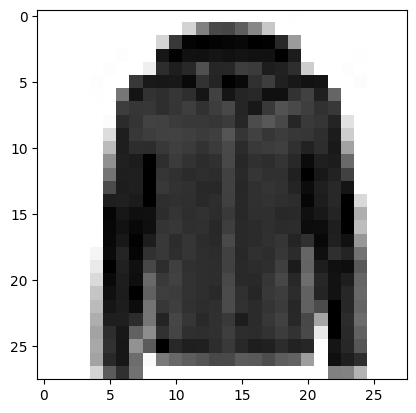

In [4]:
import matplotlib.pyplot as plt
plt.imshow(images[5000,:,:],cmap= 'binary')
plt.show()

In [5]:
import numpy as np
print(np.unique(labels)) #etiquetas
print(images.shape) #tamaño de las imágenes

[0 1 2 3 4 5 6 7 8 9]
(60000, 28, 28)


In [6]:
Xtrain, ytrain = train
Xtrain = Xtrain/255 # tipo flotante, normalizados de 0 a 1
Xtest, ytest = test
Xtest = Xtest/255 # tipo flotante, normalizados de 0 a 1

- En el cuaderno introductorio a redes neuronales con tensorflow se planteó la construcción de modelos mediante secuencia de capas:

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ red1 (Dense)                    │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hred2 (Dense)                   │ (None, 50)             │        10,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,560 (654.53 KB)

 Trainable params: 167,560 (654.53 KB)

 Non-trainable params: 0 (0.00 B)

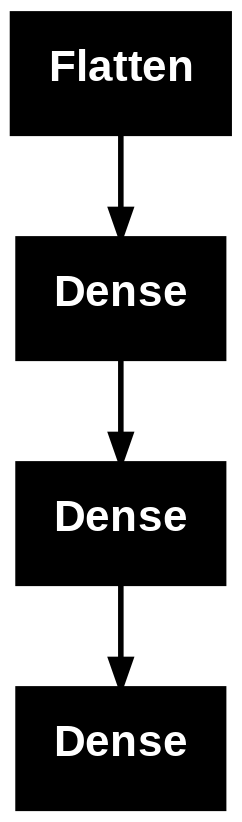

In [7]:
#definir arquitectura secuencial
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2])),
    tf.keras.layers.Dense(200,activation="relu", name='red1'),
    tf.keras.layers.Dense(50, activation="tanh",name='hred2'),
    tf.keras.layers.Dense(10,activation='softmax',name='output')
])

model.summary() # resumen del modelo
tf.keras.utils.plot_model(model) #diagrama del modelo

- Aunque la implementacióm mediante secuencia es intuitiva, no permite realizar conexiones flexibles entre capas.

- En ese sentido, Keras permite crear capas bajo el principio de funciones y argumentos, como se muestra a continuación.

**Nota**: a diferencia de la estructura secuencial, en la API funcional se debe indicar la capa o capas de entrada y la capa o capas de salida para crear el grafo computacional de forma apropiada.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ entrada (InputLayer)            │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ h1 (Dense)                      │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ h2 (Dense)                      │ (None, 50)             │        10,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,560 (654.53 KB)

 Trainable params: 167,560 (654.53 KB)

 Non-trainable params: 0 (0.00 B)

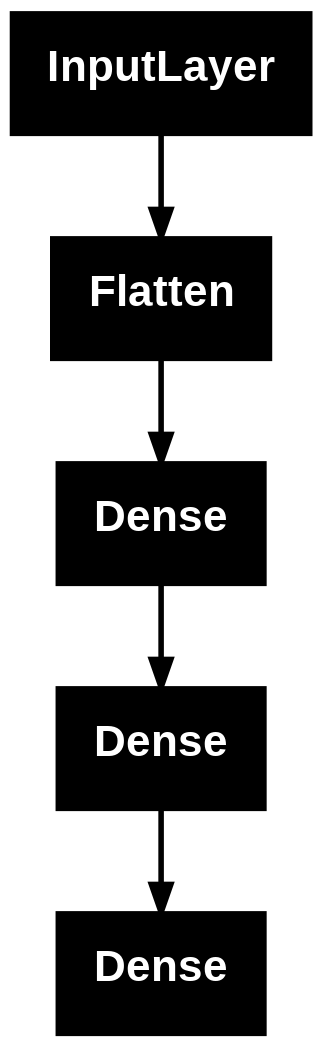

In [8]:
#arquitectura funcional
#capa de entrada
input_l = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada')
#capa de aplanamiento de las imágenes
flatten = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_l)#argumento de entrada
#capas densas
h1 = tf.keras.layers.Dense(200,activation='tanh',name='h1')(flatten)#argumento de entrada
h2 = tf.keras.layers.Dense(50,activation='tanh',name='h2')(h1)
#capa de salida
output = tf.keras.layers.Dense(10,activation="softmax",name='output')(h2)
#crear modelo según conexiones tipo funcionales
model_fun = tf.keras.Model(inputs=input_l,outputs=output)

#resumen y gráfica del modelo
model_fun.summary()
tf.keras.utils.plot_model(model_fun)


# La API funcional permite realizar conexiones más flexibles

- En el siguiente ejemplo se crea un modelo con una entrada y dos salidas con interconexiones flexibles:

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


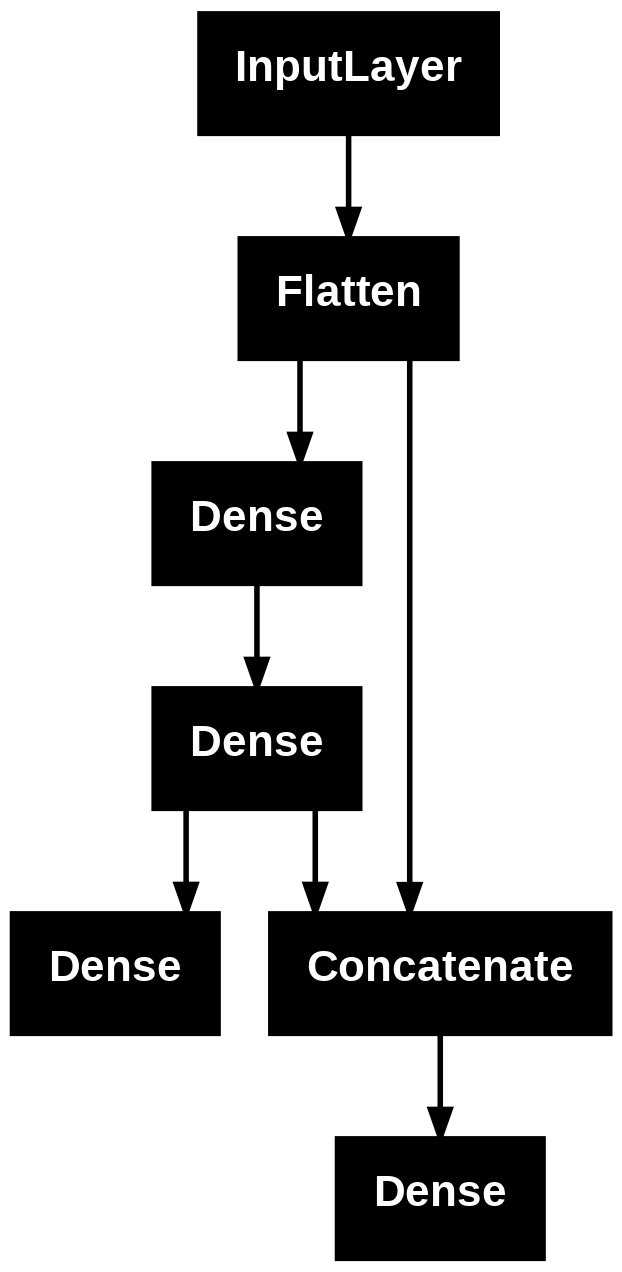

In [9]:
#arquitectura funcional 2
tf.keras.backend.clear_session()
input_l = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada')
flatten = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_l)

h1 = tf.keras.layers.Dense(200,activation='tanh',name='h1')(flatten)
h2 = tf.keras.layers.Dense(50,activation='tanh',name='h2')(h1)
#capa que concatena caracterísitacas extraídas en h2 con imágenes de entrada
concat = tf.keras.layers.concatenate([h2,flatten])
#se crean dos salidas:
output_A = tf.keras.layers.Dense(10,activation="softmax",name='outputA')(concat)#desde concatenación
output_B = tf.keras.layers.Dense(10,activation="softmax",name='outputB')(h2)#desde h2
#las entradas y salidas se ingresan como listas
model_fun = tf.keras.Model(inputs=input_l,outputs=[output_A, output_B])
#model_fun.summary()
tf.keras.utils.plot_model(model_fun)

**Nota**: si se cuenta con varias salidas se puede definir un mismo costo para cada salida, o una lista con los costos requeridos. Además, en la lista `loss_weights` se puede especificar el valor del peso asociado al costo de cada salida en el intervalo [0,1].

In [10]:
model_fun.compile(loss="sparse_categorical_crossentropy", #custom_loss(),#custom_loss(),#"sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy","accuracy"]) #f1, precision, recall, crossentropy


- El entrenamiento se realiza de igual forma al utilizado con el modelo secuencial.

- Como se fijaron dos salidas, se debe ingresar una lista para los argumentos ytrain.

In [11]:
history = model_fun.fit(Xtrain, [ytrain,ytrain] , epochs=10,batch_size=64, # 32, 64, 128, 256
                    validation_split=0.3) # se fija el conjunto de validación como el 20% del de train

Epoch 1/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 1.4820 - outputA_accuracy: 0.7301 - outputA_loss: 0.7946 - outputB_accuracy: 0.7636 - outputB_loss: 0.6875 - val_loss: 0.8686 - val_outputA_accuracy: 0.8445 - val_outputA_loss: 0.4324 - val_outputB_accuracy: 0.8408 - val_outputB_loss: 0.4356
Epoch 2/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.8124 - outputA_accuracy: 0.8525 - outputA_loss: 0.4099 - outputB_accuracy: 0.8538 - outputB_loss: 0.4025 - val_loss: 0.7825 - val_outputA_accuracy: 0.8562 - val_outputA_loss: 0.3961 - val_outputB_accuracy: 0.8604 - val_outputB_loss: 0.3851
Epoch 3/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.7149 - outputA_accuracy: 0.8689 - outputA_loss: 0.3616 - outputB_accuracy: 0.8735 - outputB_loss: 0.3533 - val_loss: 0.7243 - val_outputA_accuracy: 0.8664 - val_outputA_loss: 0.3631 - val_outputB_accuracy: 0.8678 - val_outputB_loss: 0.3601
Epoch 4/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.6705 - outputA_accuracy: 0.8750 

- Se presentan las curvas de desempeño:

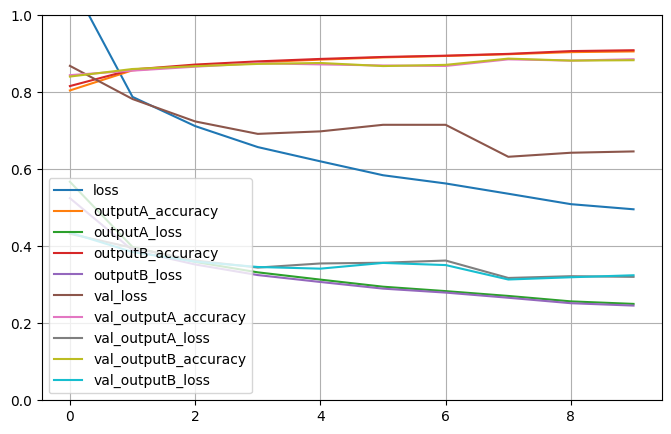

In [12]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.show()

- Como el modelo generado presenta dos salidas, el rendimiento se discrimina por cada salida y el acumulado.

- A la hora de predecir la salida para una nueva muestra, se debe tener en cuenta la cantidad de salidas fijadas.

In [13]:
yestA,yestB = model_fun.predict(Xtest)
print(yestA.shape,yestB.shape)#salidas tipo 1 -K probabilidad de membresia a cada clase

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(10000, 10) (10000, 10)


In [14]:
print(yestA[0].argmax(),ytest[0])#para estimar la etiqueta ordinal se encuentra el max por columnas

9 9


In [15]:
scoreA = model_fun.evaluate(Xtest,[ytest,ytest])#evaluacion
print(scoreA)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6978 - outputA_accuracy: 0.8765 - outputA_loss: 0.3447 - outputB_accuracy: 0.8731 - outputB_loss: 0.3531
[0.6981136798858643, 0.3467833995819092, 0.3510322868824005, 0.8758000135421753, 0.8734999895095825]


# Grafiquemos los pesos respecto a las dimensiones de la imagen original

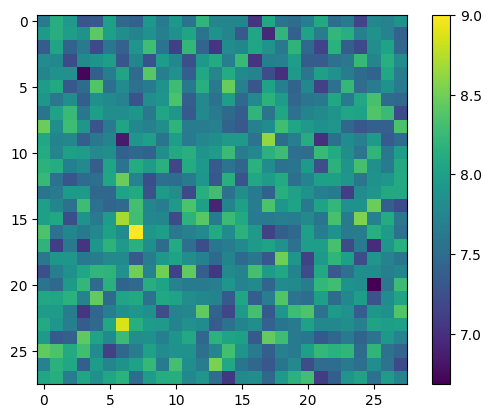

In [16]:
#se busca identificar las entradas más relevantes para la red
plt.imshow(abs(model.layers[1].get_weights()[0]).sum(axis=1).reshape(28,28))
plt.colorbar()
plt.show()

In [17]:
model.layers[1].get_weights()[1].shape # accediendo a los bias

(200,)

# Salidas parciales de la red

- La estrategia funcional nos permite acceder a partes intermedias de la red para encontrar mapas de características y verificar el aprendizaje de la representación.

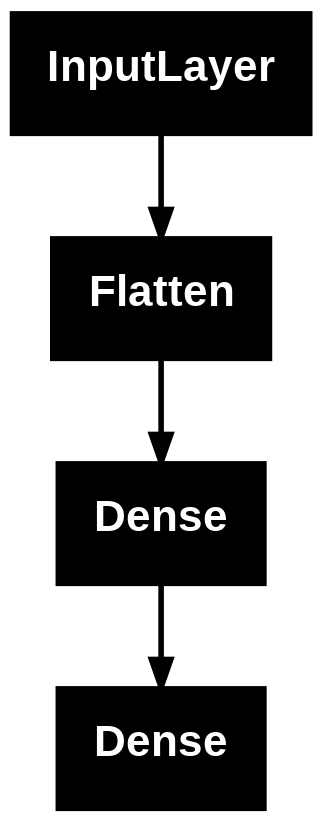

In [18]:
#crear nuevo modelo con salida parcial
model_B = tf.keras.Model(inputs=model_fun.inputs,outputs=model_fun.get_layer('h2').output) #se accede a capas por nombre
tf.keras.utils.plot_model(model_B) # modelo ya esta ajustado!


In [19]:
z = model_B.predict(Xtest) # salida en h2
z.shape

 42/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['entrada']
Received: inputs=Tensor(shape=(32, 28, 28))
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['entrada']
Received: inputs=Tensor(shape=(None, 28, 28))
  warnings.warn(msg)


(10000, 50)

### Dado que se fijaron 50 unidades, se pueden utilizar técnicas de reducción de dimensión para visualizar los patrones intermedios de la red en 2D.


# Principal Component Analysis (PCA)

Reducción de dimensión lineal basado en la preservación de la varianza

![PCA1](https://www.soloentendidos.com/wp-content/uploads/2021/06/Principal-Component-Analysis-second-principal_thumb-1.gif)


![PCA2](https://1.bp.blogspot.com/-pgMAHiIWvuw/Tql5HIXNdRI/AAAAAAAABLI/I2zPF5cLRwQ/s1600/clust.gif)


# t-student distributed Stochastic Neighbor Embedding (t-SNE)

Reducción de dimensión basado en la preservación de localidades (vecinos) utilizando medidas de información desde estimación no paramétrica de probabilidad en el espación de alta y baja dimensión, respectivamente.

![tsne](https://learnopencv.com/wp-content/uploads/2022/11/tsne.gif)

![tsne2](https://3.bp.blogspot.com/-NE01azL_JxU/Wxli17oYNzI/AAAAAAAACxQ/axOI2yy-Ft0QbqaekOyemm5Xn0wAFvRUwCLcBGAs/s640/image2.gif)

In [20]:
from sklearn.decomposition import PCA
zpca = PCA(n_components=2).fit_transform(z)
zpca.shape

(10000, 2)

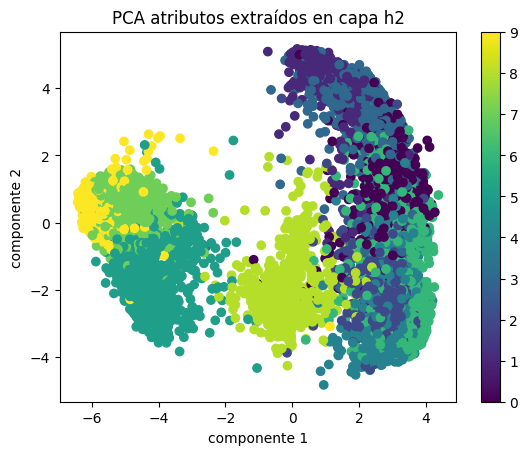

In [21]:
plt.scatter(zpca[:,0],zpca[:,1],c=ytest)
plt.colorbar()
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('PCA atributos extraídos en capa h2')
plt.show()

In [22]:
#plot mnist 2D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
def plot_mnist_2d(Z,y,images,img_w=28,img_h=28,zoom=0.5,cmap='jet'):
    fig, ax = plt.subplots(figsize=(16,10))
    for i in range(Z.shape[0]):
        #print('img',i+1,'/',Z.shape[0])
        image = images[i].reshape((img_w, img_h))
        im = OffsetImage(image, zoom=zoom,cmap=cmap)
        ab = AnnotationBbox(im, (Z[i,0], Z[i,1]), xycoords='data', frameon=False)
        ax.add_artist(ab)
        ax.update_datalim([(Z[i,0], Z[i,1])])
        ax.autoscale()

- También, podemos revisar la distribución de las imágenes en el espacio proyectado:

Text(0.5, 1.0, 'PCA atributos extraídos en capa h2')

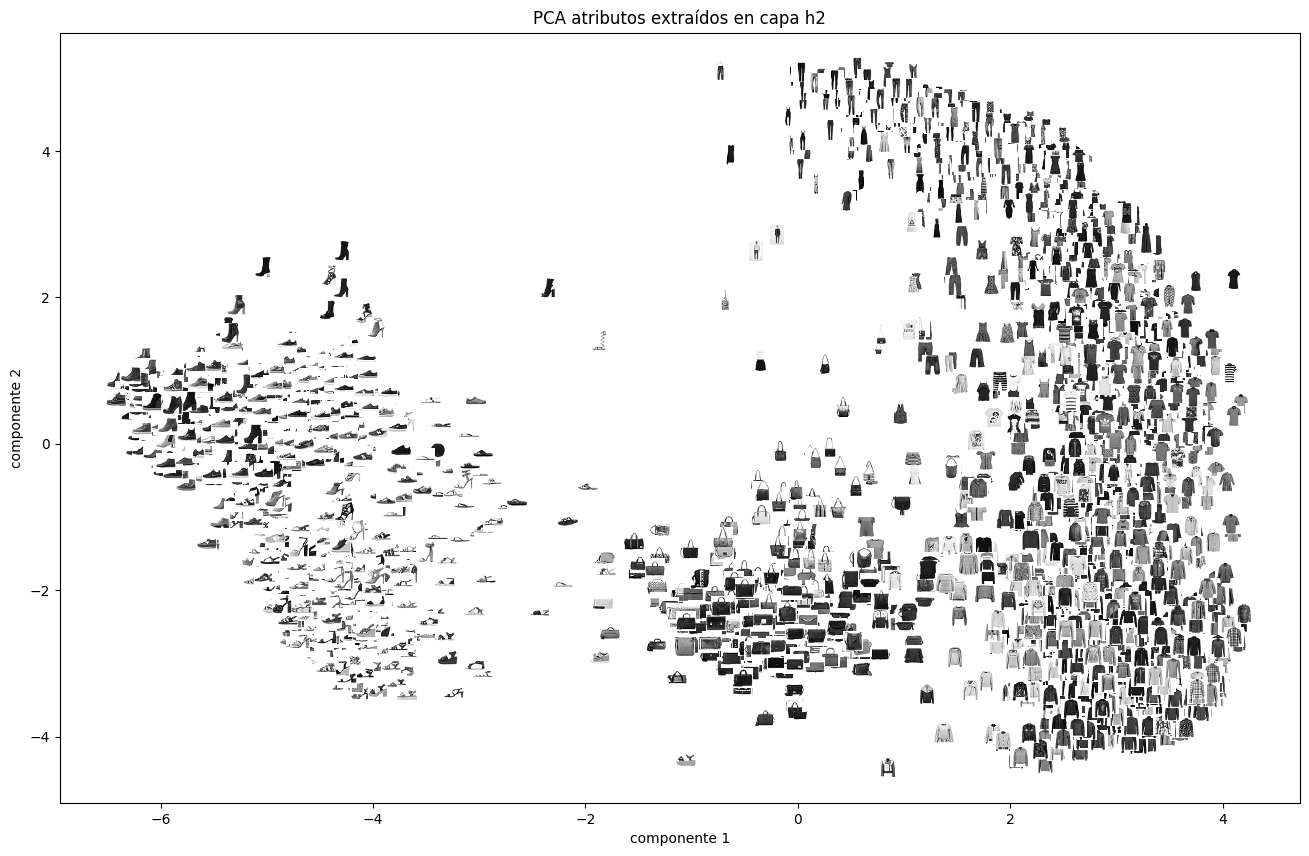

In [23]:
Ni =4000 # graficar Ni muestras como imagenes en espacio 2D
ind = np.random.randint(0,ytest.shape[0],Ni)
plot_mnist_2d(zpca[ind],ytest[ind],Xtest[ind],img_w=28,img_h=28,zoom=0.5,cmap='binary')
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('PCA atributos extraídos en capa h2')

# Ejercicio:

- Grafique el espacio proyectado de PCA en 2D (etiquetas e imágenes) para los atributos aprendidos por la capa de concatenación.

- Repita el proceso aplicando la técnica de reducción de dimensión [UMAP de RAPIDS](https://developer.nvidia.com/blog/even-faster-and-more-scalable-umap-on-the-gpu-with-rapids-cuml/).

- Plantee una nueva arquitectura tipo funcional utilizando capas convolucionales (Ver cuaderno [CNNs](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/5_DeepLearning/3_Introduccion_CNN.ipynb)) para el entrenamiento de la base de datos Mnist-digitos, utilizando tres entradas: i) imágenes limpias, ii) y iii) imágenes con ruido blanco Gaussiano ante diferentes varianzas, y dos salidas i) estimación del digito, ii) estimación número par número impar.

In [24]:
#Ayuda de código:
#cargar fashion mnist o mnist
#(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train, X_valid = X_train[:-55000], X_train[-55000:]
y_train, y_valid = y_train[:-55000], y_train[-55000:]

X_train = X_train[..., np.newaxis]/255.
X_valid = X_valid[..., np.newaxis]/255.
X_test = X_test[..., np.newaxis]/255.
print(X_train.shape,X_valid.shape,X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(5000, 28, 28, 1) (55000, 28, 28, 1) (10000, 28, 28, 1)


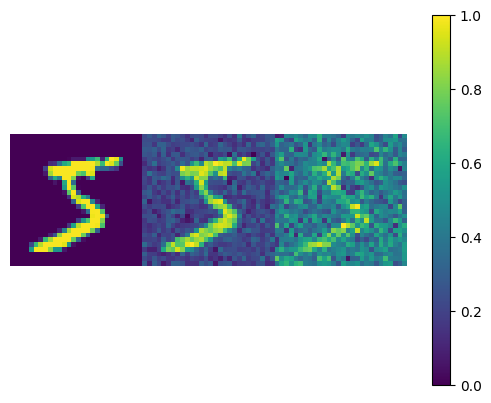

In [25]:
#crear entradas con y sin ruido
from sklearn.preprocessing import MinMaxScaler

var_ = [0.01,0.25]
inputs_train = [X_train]
inputs_valid = [X_valid]
inputs_test = [X_test]

#recorrer varianzas
for var_i in var_:
    dim = X_train.shape
    #definir ruido
    tmp = X_train + (np.sqrt(var_i)*np.random.randn(X_train.shape[0],dim[1],dim[2],dim[3]))
    tmp = MinMaxScaler().fit_transform(tmp.reshape(dim[0],-1).T).T #fijar señal con ruido de 0 a 1
    inputs_train += [tmp.reshape(dim)]

    dim = X_valid.shape
    tmp = X_valid + (np.sqrt(var_i)*np.random.randn(X_valid.shape[0],dim[1],dim[2],dim[3]))
    tmp = MinMaxScaler().fit_transform(tmp.reshape(dim[0],-1).T).T
    inputs_valid += [tmp.reshape(dim)]

    dim = X_test.shape
    tmp = X_test + (np.sqrt(var_i)*np.random.randn(X_test.shape[0],dim[1],dim[2],dim[3]))
    tmp = MinMaxScaler().fit_transform(tmp.reshape(dim[0],-1).T).T
    inputs_test += [tmp.reshape(dim)]


plt.imshow(np.c_[inputs_train[0][0,:,:,0],inputs_train[1][0,:,:,0],inputs_train[2][0,:,:,0]])
plt.axis('off')
plt.colorbar()
plt.show()

In [26]:
#veector de salida par o impar
ytrain_B = (ytrain % 2)
print(ytrain_B[10:])
print(ytrain[10:])

[0 1 1 ... 1 0 1]
[0 9 5 ... 3 0 5]


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


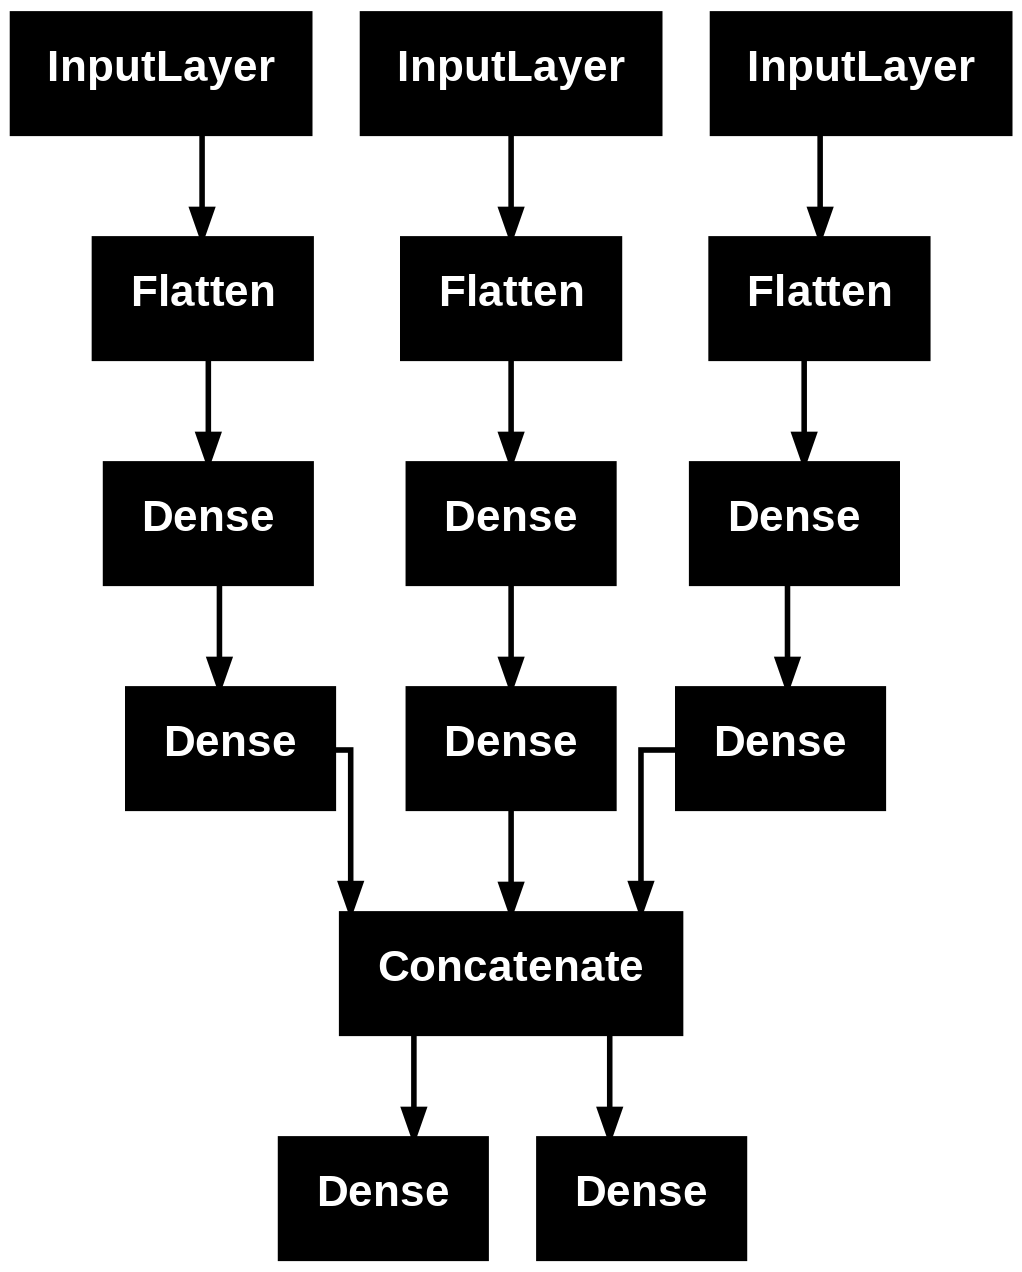

In [27]:
#arquitectura funcional 2 - Ayuda de código con capas densas - cambiar a capas cnn
tf.keras.backend.clear_session()
input_1 = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada_1')
input_2 = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada_2')
input_3 = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada_3')

flatten_1 = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_1)
flatten_2 = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_2)
flatten_3 = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_3)

h1_1 = tf.keras.layers.Dense(200,activation='tanh',name='h1_1')(flatten_1)
h2_1 = tf.keras.layers.Dense(50,activation='tanh',name='h2_1')(h1_1)

h1_2 = tf.keras.layers.Dense(200,activation='tanh',name='h1_2')(flatten_2)
h2_2 = tf.keras.layers.Dense(50,activation='tanh',name='h2_2')(h1_2)

h1_3 = tf.keras.layers.Dense(200,activation='tanh',name='h1_3')(flatten_3)
h2_3 = tf.keras.layers.Dense(50,activation='tanh',name='h2_3')(h1_3)

#capa que concatena caracterísitacas extraídas en h2 con imágenes de entrada
concat = tf.keras.layers.concatenate([h2_1,h2_2,h2_3])
#se crean dos salidas:
output_d = tf.keras.layers.Dense(10,activation="softmax",name='output_d')(concat)#desde concatenación
output_p = tf.keras.layers.Dense(1,activation="sigmoid",name='output_p')(concat)#desde h2
#las entradas y salidas se ingresan como listas
model_fun2 = tf.keras.Model(inputs=[input_1,input_2,input_3],outputs=[output_d, output_p])
#model_fun.summary()
tf.keras.utils.plot_model(model_fun2)

In [29]:
#Entrenar y ajustar el modelo, revisar rendimientos en cada salida

model_fun2.compile(
    loss=["sparse_categorical_crossentropy", "binary_crossentropy"],
    optimizer="adam",
    metrics=["accuracy", "accuracy"]  # Una métrica por salida
)


history = model_fun2.fit(
    inputs_train, [y_train, y_train % 2],
    epochs=10,
    batch_size=64,
    validation_data=(inputs_valid, [y_valid, y_valid % 2])
)


Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 86ms/step - loss: 1.8519 - output_d_accuracy: 0.5772 - output_d_loss: 1.3689 - output_p_accuracy: 0.7669 - output_p_loss: 0.4827 - val_loss: 0.7653 - val_output_d_accuracy: 0.8690 - val_output_d_loss: 0.4727 - val_output_p_accuracy: 0.8830 - val_output_p_loss: 0.2923
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.6361 - output_d_accuracy: 0.8992 - output_d_loss: 0.3843 - output_p_accuracy: 0.8955 - output_p_loss: 0.2520 - val_loss: 0.6219 - val_output_d_accuracy: 0.8888 - val_output_d_loss: 0.3992 - val_output_p_accuracy: 0.9178 - val_output_p_loss: 0.2225
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.4673 - output_d_accuracy: 0.9258 - output_d_loss: 0.2859 - output_p_accuracy: 0.9392 - output_p_loss: 0.1814 - val_loss: 0.5288 - val_output_d_accuracy: 0.8978 - val_output_d_loss: 0.3421 - val_output_p_accuracy: 0.9320 - val_output_p_loss: 0.1864
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.3910 - outp

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


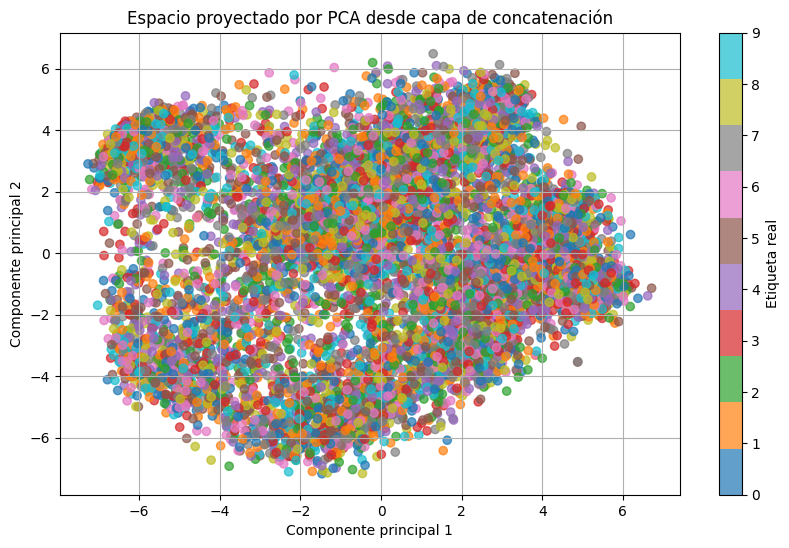

In [30]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# Crear un nuevo modelo desde las entradas hasta la capa 'concat'
model_concat = tf.keras.Model(inputs=model_fun2.inputs, outputs=model_fun2.get_layer('concatenate').output)

# Obtener las activaciones de la capa 'concat' para el conjunto de test
z_concat = model_concat.predict(inputs_test)

# Aplicar PCA para reducir a 2D
zpca = PCA(n_components=2).fit_transform(z_concat)

# Visualización
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
scatter = plt.scatter(zpca[:, 0], zpca[:, 1], c=ytest, cmap="tab10", alpha=0.7)
plt.colorbar(scatter, label="Etiqueta real")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.title("Espacio proyectado por PCA desde capa de concatenación")
plt.grid(True)
plt.show()


[2025-06-08 20:46:25.852] [CUML] [info] build_algo set to brute_force_knn because random_state is given


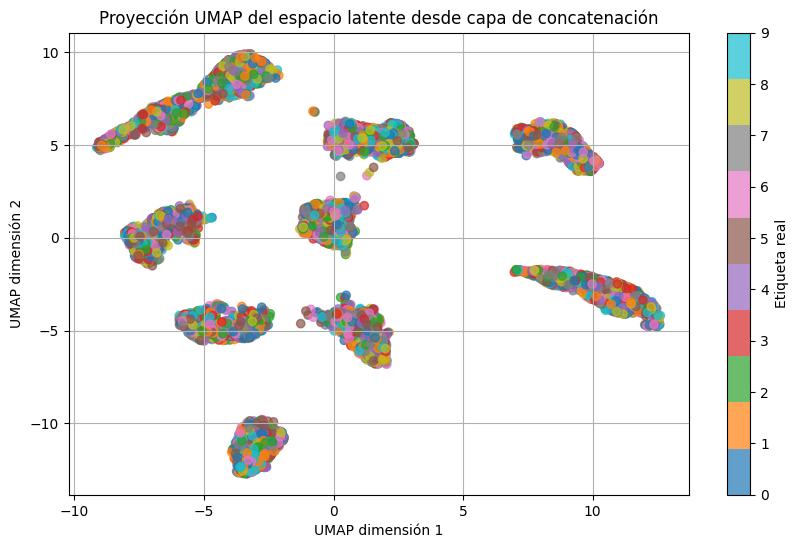

In [31]:
from cuml import UMAP
import cupy as cp

# Convertir los datos a GPU con cupy
z_concat_gpu = cp.asarray(z_concat)

# Aplicar UMAP
umap = UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42)
z_umap_gpu = umap.fit_transform(z_concat_gpu)

# Convertir de vuelta a NumPy para graficar
z_umap = cp.asnumpy(z_umap_gpu)

# Graficar resultados
plt.figure(figsize=(10, 6))
scatter = plt.scatter(z_umap[:, 0], z_umap[:, 1], c=ytest, cmap="tab10", alpha=0.7)
plt.colorbar(scatter, label="Etiqueta real")
plt.xlabel("UMAP dimensión 1")
plt.ylabel("UMAP dimensión 2")
plt.title("Proyección UMAP del espacio latente desde capa de concatenación")
plt.grid(True)
plt.show()


### Comparación entre PCA y UMAP sobre el espacio latente (`concat`)

Se utilizó UMAP (Uniform Manifold Approximation and Projection) desde la librería RAPIDS para proyectar a 2 dimensiones el espacio generado por la capa de concatenación del modelo funcional.

**Observaciones clave**:
- UMAP logra separar las clases de forma mucho más clara que PCA.
- Esto ocurre porque UMAP preserva relaciones **locales no lineales**, mientras que PCA solo conserva varianza lineal.
- La concatenación de múltiples vistas (imagen limpia + dos versiones ruidosas) parece haber reforzado la representación interna del modelo, facilitando la separación posterior.
- Este análisis confirma que el modelo aprende representaciones **robustas al ruido** y **discriminativas** para la tarea de clasificación.

En escenarios reales, este tipo de análisis es útil para:
- Evaluar la calidad del embedding.
- Validar si el modelo ha aprendido estructuras relevantes sin supervisión directa del espacio latente.


## Arquitectura funcional con CNN y entradas múltiples

Para aumentar la robustez del modelo ante ruido, se construyó una red neuronal convolucional (CNN) de arquitectura funcional con las siguientes características:

- **Entradas**:
  1. Imagen limpia
  2. Imagen con ruido blanco gaussiano (varianza 0.01)
  3. Imagen con ruido blanco gaussiano (varianza 0.25)

- **Arquitectura**:
  - Cada entrada es procesada por una rama CNN independiente (Conv2D + MaxPooling + Flatten).
  - Las salidas intermedias se concatenan.
  - Se utilizan dos salidas:
    - `output_d`: clasificación multiclase del dígito.
    - `output_p`: clasificación binaria (par o impar).

Esta configuración permite que la red aproveche características redundantes y complementarias de múltiples vistas para mejorar su desempeño.


In [32]:
tf.keras.backend.clear_session()

from tensorflow import keras
from tensorflow.keras import layers

# Entradas (tres vistas de la misma imagen)
input_1 = layers.Input(shape=(28, 28, 1), name='input_limpia')
input_2 = layers.Input(shape=(28, 28, 1), name='input_ruido_001')
input_3 = layers.Input(shape=(28, 28, 1), name='input_ruido_025')

def build_cnn_branch(input_layer):
    """Rama convolucional compartida para cada entrada."""
    x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(input_layer)
    x = layers.MaxPooling2D((2,2))(x)
    x = layers.Conv2D(64, (3,3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2,2))(x)
    x = layers.Flatten()(x)
    return x

# Crear tres ramas con pesos independientes
branch_1 = build_cnn_branch(input_1)
branch_2 = build_cnn_branch(input_2)
branch_3 = build_cnn_branch(input_3)

# Concatenar representaciones
concat = layers.concatenate([branch_1, branch_2, branch_3])

# Capa intermedia compartida
x = layers.Dense(128, activation='relu')(concat)

# Salida 1: Clasificación multiclase (dígito)
output_d = layers.Dense(10, activation='softmax', name='output_d')(x)

# Salida 2: Clasificación binaria (par/impar)
output_p = layers.Dense(1, activation='sigmoid', name='output_p')(x)

# Modelo final
model_cnn = keras.Model(inputs=[input_1, input_2, input_3],
                        outputs=[output_d, output_p])

# Visualización
keras.utils.plot_model(model_cnn, show_shapes=True)
model_cnn.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_limpia        │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_ruido_001     │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_ruido_025     │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 28, 28,    │        320 │ input_limpia[0][… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 28, 28,    │        320 │ input_ruido_001[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 28, 28,    │        320 │ input_ruido_025[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 14, 14,    │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 14, 14,    │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 14, 14,    │          0 │ conv2d_4[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 14, 14,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 14, 14,    │     18,496 │ max_pooling2d_2[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 14, 14,    │     18,496 │ max_pooling2d_4[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 7, 7, 64)  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 7, 7, 64)  │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 7, 7, 64)  │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 3136)      │          0 │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 3136)      │          0 │ max_pooling2d_3[… │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 1,262,219 (4.81 MB)

 Trainable params: 1,262,219 (4.81 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model_cnn.compile(
    loss=["sparse_categorical_crossentropy", "binary_crossentropy"],
    optimizer="adam",
    metrics=["accuracy", "accuracy"]
)


In [34]:
history_cnn = model_cnn.fit(
    inputs_train,                  # [imagen_limpia, ruido_001, ruido_025]
    [y_train, y_train % 2],        # [dígito, par/impar]
    validation_data=(inputs_valid, [y_valid, y_valid % 2]),
    epochs=10,
    batch_size=64,
    verbose=2
)


Epoch 1/10
79/79 - 15s - 190ms/step - loss: 1.0792 - output_d_accuracy: 0.7712 - output_d_loss: 0.7585 - output_p_accuracy: 0.8586 - output_p_loss: 0.3114 - val_loss: 0.5992 - val_output_d_accuracy: 0.8987 - val_output_d_loss: 0.3119 - val_output_p_accuracy: 0.8738 - val_output_p_loss: 0.2870
Epoch 2/10
79/79 - 11s - 142ms/step - loss: 0.3187 - output_d_accuracy: 0.9442 - output_d_loss: 0.1993 - output_p_accuracy: 0.9592 - output_p_loss: 0.1192 - val_loss: 0.2877 - val_output_d_accuracy: 0.9476 - val_output_d_loss: 0.1725 - val_output_p_accuracy: 0.9566 - val_output_p_loss: 0.1150
Epoch 3/10
79/79 - 5s - 62ms/step - loss: 0.1975 - output_d_accuracy: 0.9634 - output_d_loss: 0.1211 - output_p_accuracy: 0.9750 - output_p_loss: 0.0761 - val_loss: 0.2109 - val_output_d_accuracy: 0.9574 - val_output_d_loss: 0.1325 - val_output_p_accuracy: 0.9723 - val_output_p_loss: 0.0783
Epoch 4/10
79/79 - 4s - 44ms/step - loss: 0.1335 - output_d_accuracy: 0.9766 - output_d_loss: 0.0805 - output_p_accuracy

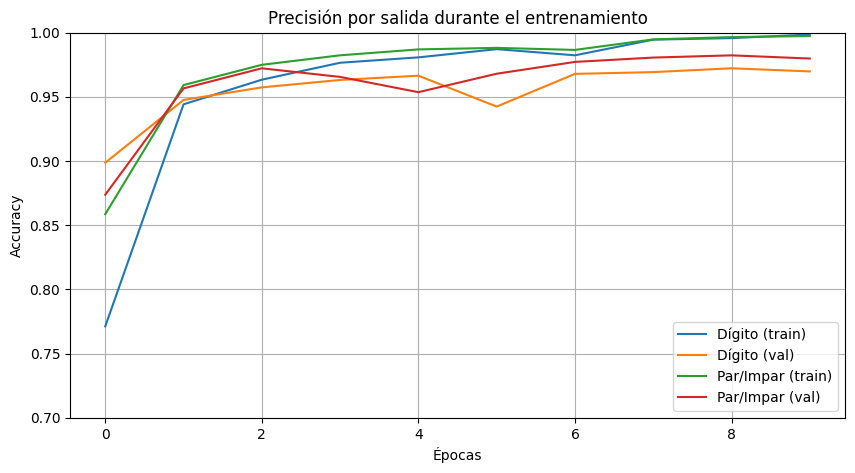

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history_cnn.history)[[
    "output_d_accuracy", "val_output_d_accuracy",
    "output_p_accuracy", "val_output_p_accuracy"
]].plot(figsize=(10, 5), grid=True)
plt.title("Precisión por salida durante el entrenamiento")
plt.ylabel("Accuracy")
plt.xlabel("Épocas")
plt.legend(["Dígito (train)", "Dígito (val)", "Par/Impar (train)", "Par/Impar (val)"])
plt.ylim(0.7, 1.0)
plt.show()


In [37]:
test_scores = model_cnn.evaluate(inputs_test, [y_test, y_test % 2], verbose=0)
print(f"\nTest accuracy (dígito): {test_scores[3]:.4f}")
print(f"Test accuracy (par/impar): {test_scores[4]:.4f}")



Test accuracy (dígito): 0.9741
Test accuracy (par/impar): 0.9833


## Conclusión del modelo multientrada con CNN

Se construyó una arquitectura funcional con tres ramas convolucionales independientes, cada una procesando:

1. Imagen limpia
2. Imagen con ruido blanco gaussiano (var = 0.01)
3. Imagen con ruido blanco gaussiano (var = 0.25)

Las características extraídas se concatenaron y se usaron para dos tareas:
- Clasificación multiclase del dígito (`output_d`)
- Clasificación binaria par/impar (`output_p`)

### Resultados sobre el conjunto de test:

- **Precisión clasificación dígitos**: 97.41%
- **Precisión clasificación par/impar**: 98.33%

Estos resultados demuestran la capacidad del modelo para:
- Aprender representaciones discriminativas aún bajo ruido.
- Generalizar efectivamente a múltiples tareas usando vistas complementarias de la misma imagen.

Además, el análisis con **PCA** y **UMAP de RAPIDS** confirma que el espacio latente aprendido (capa `concat`) presenta **una clara estructura separable por clases**, validando la calidad de los embeddings generados por la red.

